In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
Marks = np.array([[3, 4], [2, 8], [6, 9]])
print(Marks)

[[3 4]
 [2 8]
 [6 9]]


In [3]:
df = pd.DataFrame(Marks, columns=['Physics', 'Maths'])
df

,Physics,Maths
0,3,4
1,2,8
2,6,9


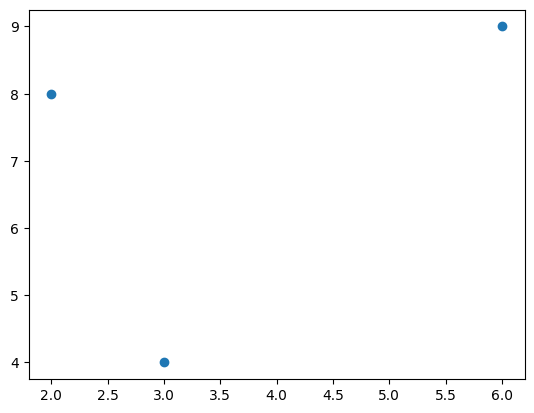

In [4]:
plt.scatter(df['Physics'], df['Maths'])

In [5]:
mean_by_col = np.mean(Marks.T, axis=1)
Marks.T

array([[3, 2, 6],
       [4, 8, 9]])

In [20]:
scaled_data = Marks - mean_by_col
scaled_data


,physics,math
0,-0.666667,-3.0
1,-1.666667,1.0
2,2.333333,2.0


In [22]:
scaled_df = pd.DataFrame(scaled_data, columns=['Physics', 'Math'])
scaled_df

,Physics,Math
0,-0.666667,-3.0
1,-1.666667,1.0
2,2.333333,2.0


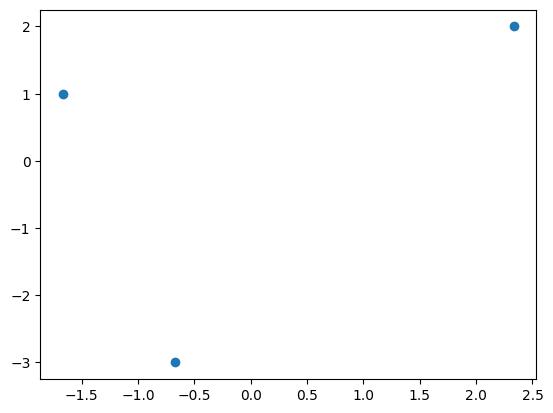

In [8]:
plt.scatter(scaled_df['Physics'], scaled_df['Math'])

In [9]:
cov_mat = np.cov(scaled_data.T)
cov_mat

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [10]:
Eval, Evec = eig(cov_mat)
print(f'Eigen Value: {Eval}')
print(f'Eigen Vector: {Evec}')

Eigen Value: [2.83333333 8.5       ]
Eigen Vector: [[-0.85749293 -0.51449576]
 [ 0.51449576 -0.85749293]]


In [11]:
projected_data = Evec.T.dot(scaled_data.T)
projected_data

array([[-9.71825316e-01,  1.94365063e+00, -9.71825316e-01],
       [ 2.91547595e+00,  1.11022302e-16, -2.91547595e+00]])

In [12]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit_transform(Marks)

array([[ 2.91547595e+00, -9.71825316e-01],
       [-7.37588530e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [13]:
pca.explained_variance_ratio_

array([0.75, 0.25])

In [14]:
#principal component DF
pc_df = pd.DataFrame(data=pca.fit_transform(Marks), columns=['PC1', 'PC2'])
pc_df

,PC1,PC2
0,2.915476e+00,-0.971825
1,-7.375885e-16,1.943651
2,-2.915476e+00,-0.971825


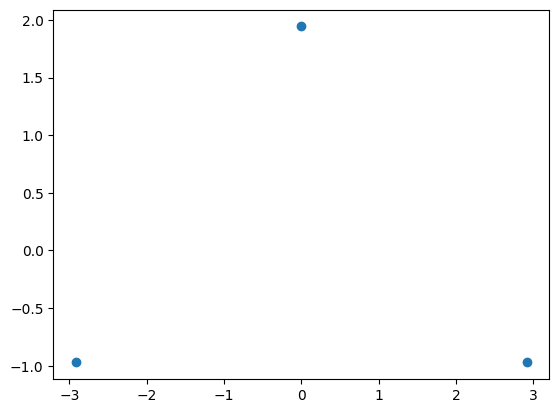

In [15]:
plt.scatter(pc_df['PC1'], pc_df['PC2'])

In [16]:
# loadings: how much weight each variable has in principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['Physics', 'Math'])
loadings

,PC1,PC2
Physics,-0.514496,-0.857493
Math,-0.857493,0.514496


In [17]:
pca.inverse_transform(pca.fit_transform(Marks))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])